In [1]:
# Open source data analysis and manipulation tool.
import pandas as pd

# Python data visualization library.
import seaborn as sns

#It provides numerical routines for numerical integration, interpolation, optimization, linear algebra, and statistics.
import scipy.stats as ss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### https://docs.scipy.org/doc/scipy/reference/stats.html
##### https://seaborn.pydata.org/

### MUESTRA Y POBLACIÓN

In [2]:
import random
from collections import Counter
rolled = []
repeat = 0
tiros = 10
while repeat < tiros:
    dices = random.randint(1,6)
    rolled.append(dices)
    repeat = repeat +1
d = dict(Counter(rolled))
for k, v in d.items():
    pct = v * 100.0 / tiros
    print(k, pct)

2 16.99
1 16.97
5 17.17
4 16.43
3 16.1
6 16.34


***Población. Es el conjunto de personas u objetos de los que se desea conocer algo en una investigación.***

***Muestra. Es un subconjunto o parte del universo o población en que se llevará a cabo la investigación. Hay procedimientos para obtener la cantidad de los componentes de la muestra como fórmulas, lógica y otros que se vera más adelante. La muestra es una parte representativa de la población.***

### ¿Qué buscamos? ¿Cuál es nuestra hipótesis?

Los datos que buscamos, los atributos que medimos o recolectamos y las comparaciones que hagamos dependen en primera instancia de aquello que perseguimos

In [3]:
path = 'C:/Users/Leand/OneDrive/Documentos/Lean/SBG/Estadistica/'
df = pd.read_csv(path + 'Tabla_estadistica.csv', sep=';', header=0)
del df['Numero']

In [4]:
df.head()

,Fecha,Sexo,Poblacion,AdenoV,RSV,INFA,INFB,PIV1,PIV2,PIV3,Edad(meses)
0,03/01/11,F,CABA,-,-,-,-,-,-,-,96.0
1,03/01/11,F,LA FERRERE,-,-,-,-,-,-,-,4.0
2,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
3,03/01/11,M,VILLA CELINA,-,-,-,-,-,-,-,8.0
4,03/01/11,F,NaN,-,-,-,-,-,-,-,9.0


In [5]:
df.describe()

,Edad(meses)
count,6730.000000
mean,17.806300
std,92.370807
min,0.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,6120.000000


### ¿Qué hacemos si faltan valores para algunos atributos?

*Ante la falta de valores tenemos tres opciones:*

   *- Eliminamos cada suceso que tenga al menos un valor faltante.*
    
   *- Reemplazamos los valores faltantes por el valor más frecuente
      si el atributo es categórico o por el promedio si es numérico.*
      
   *-Eliminar los atributos con datos faltantes.*
      
*¿Qué harían ustedes?*

In [7]:
df = df.dropna()

### ¿Qué nos dicen los datos?¿Tienen sentido?

***Hay datos que se alejan del comportamiento estándar y para eso tenemos conocer las razones***

***-Errores al cargar los datos***

***-Valores erráticos (Outliers)***

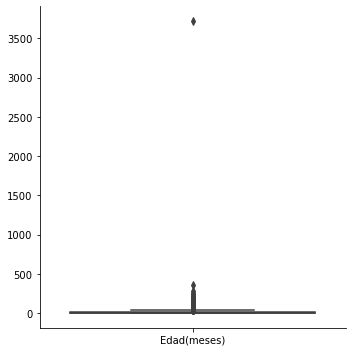

In [8]:
sns.catplot(x=None, y=None, kind="box", data=df)

***Criterio IQR para el tratamiento de outliers***

In [9]:
Q1 = df['Edad(meses)'].quantile(0.02)
Q3 = df['Edad(meses)'].quantile(0.98)
IQR = Q3 - Q1
idx = ~((df['Edad(meses)'] < (Q1 - 1.5 * IQR)) | (df['Edad(meses)'] > (Q3 + 1.5 * IQR)))

In [10]:
df1 = df[idx.values]

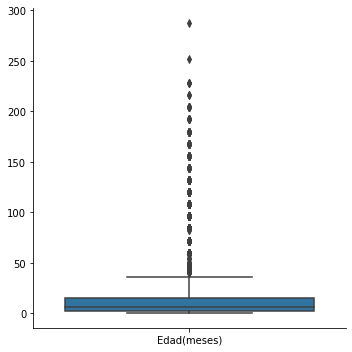

In [11]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data=df1)

**Criterio de z-score para el tratamiento de outliers**

In [12]:
# Test de outliers

'''Este test me devuelve las posiciones que tiene un z-score por encima del valor de referencia;
es decir, las posiciones de los datos outliers'''

#Calcula el estadístico del test
z = np.abs(ss.zscore(df['Edad(meses)']))

#Muestra las posiciones donde están los outliers
threshold = 3
print(np.where(z > threshold))

[1.2322924  0.22485029 0.16149626 ... 0.47204404 0.22485029 0.20595711]
(array([  84,  243,  328, 1438, 2115, 3212, 3345, 3640, 3706], dtype=int64),)


In [13]:
# Elimino outliers

df_no_outliers = df[(z < threshold)]

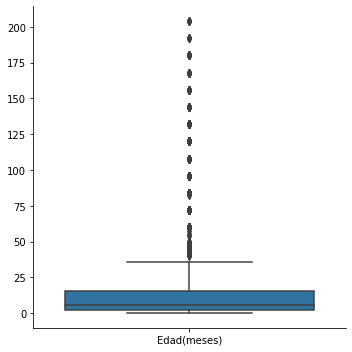

In [14]:
#Volvemos a graficar
sns.catplot(x=None, y=None, kind="box", data= df_no_outliers)

### ¿Qué se puede decir de las edades?

##### Cálculo de frecuencias

In [15]:
cumfreq = ss.cumfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)
relfreq = ss.relfreq(df['Edad(meses)'], numbins=10, defaultreallimits=None, weights=None)

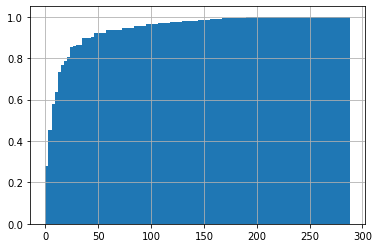

In [33]:
# Cumulative counts:
df1['Edad(meses)'].hist(cumulative=True, density=1, bins=100)
plt.show()

C:\Users\Leand\PyMOL\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


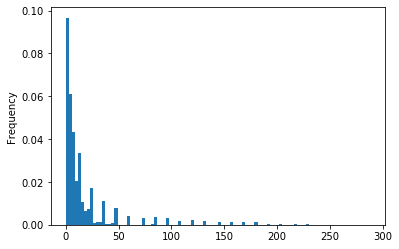

In [30]:
#Graficamos la distribuicón de los datos: histograma
%matplotlib inline
x = df1['Edad(meses)']
plt.hist(x, normed=True, bins=100)
plt.ylabel('Frequency');

**¿Qué conclusiones podemos sacar?**

In [37]:
# Test de distribución

print(ss.normaltest(df1['Edad(meses)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(df1['Edad(meses)']))

NormaltestResult(statistic=3395.494093628281, pvalue=0.0)
(0.5396159887313843, 0.0)


**¿Qué podemos decir de esto?**

# Manejo de datos cualitativos

**Graficamos el número de casos de cada grupo**

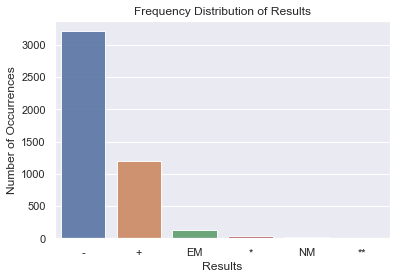

In [38]:
carrier_count = df1 ['RSV'].value_counts()

#definimos el estilo de gráfico
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
#titulo
plt.title('Frequency Distribution of Results')
#Nombres de los ejes
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Results', fontsize=12)

plt.show()

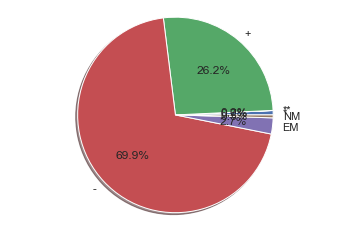

In [39]:
labels = df1 ['RSV'].astype('category').cat.categories.tolist()
counts = df1 ['RSV'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### ¿Cómo podríamos saber si existe relación entre la infección con más de un virus?

***Tablas de contingencia***

In [47]:
df2 = df1 ['RSV'] + df1 ['AdenoV']

a = df1 ['RSV'] == '+'
b = df1 ['AdenoV'] == '+'

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)

In [48]:
#Test de comparación de datos cualitativos
ss.chisquare(groups, ddof=0, axis=0)

Power_divergenceResult(statistic=6527.826730518067, pvalue=0.0)

**¿Cómo podría saber si ser positivo para RSV es más probable en chicos que en grandes?**

**Obteniendo previamente los datos del servicio meteorológico nacional:
¿podrían hacer alguna inferencia de la relación entre la temperatura ambiente y/o la radiación con la incidencia y prevalencia de cada virus?**

https://www.smn.gob.ar/descarga-de-datos

**¿Existe una correlación entre la prevalencia de casos positivos respecto de la temperatura promedio por mes?**

**¿Se les ocurre alguna manera de trabajar con estos datos y comparar distribuciones?**

In [49]:
#Separo los datos en dos grupos

df_pos = df1[df1['RSV'] == '+']
df_neg = df1[df1['RSV'] == '-']

In [50]:
ss.ttest_ind(df_pos['Edad(meses)'], df_neg['Edad(meses)'], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

In [100]:
print ('Edades promedio de postivos = ' + str(df_pos['Edad(meses)'].mean()))
print ('Edades promedio de negativos = ' + str(df_neg['Edad(meses)'].mean()))

Edades promedio de postivos = 9.705598243688259
Edades promedio de negativos = 18.75326251896811


In [52]:
import scipy.stats

mean_pos = df_pos['Edad(meses)'].mean()
std_pos = df_pos['Edad(meses)'].std()
count_pos = df_pos['Edad(meses)'].count()
mean_neg = df_neg['Edad(meses)'].mean()
std_neg =  df_neg['Edad(meses)'].std()
count_neg = df_neg['Edad(meses)'].count()




ss.ttest_ind_from_stats(mean_pos, std_pos, count_pos, mean_neg, std_neg, count_neg, equal_var=True)

Ttest_indResult(statistic=-8.936357760462757, pvalue=5.798603181591831e-19)

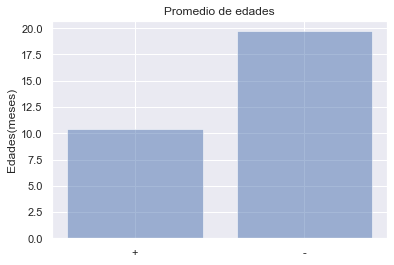

In [53]:
objects = ('+', '-')
y_pos = np.arange(len(objects))
performance = [df_pos['Edad(meses)'].mean(),df_neg['Edad(meses)'].mean()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Edades(meses)')
plt.title('Promedio de edades')

plt.show()

In [64]:
path = 'C:/Users/Leand/OneDrive/Documentos/Lean/SBG/Estadistica/'

df = pd.read_csv(path + 'kcat_km.csv', sep=',', header=0, encoding= 'unicode_escape').astype(float)

In [68]:
df = df.dropna()

In [69]:
df

,B-lactamasas,Desplazamientos,BPN,AMP,OXA,TIC,PIP,CFT,CFX,CFP,IMI,MER
1,48.0,1.580347,0.073494,0.060833,0.040476,0.227778,0.257143,0.306122,1.000000,0.400000,0.58,0.5
2,54.0,7.634224,0.024096,0.020833,0.023810,0.034722,0.121429,0.030612,0.166667,0.333333,1.00,1.0
5,181.0,1.313378,0.042892,0.250000,0.041667,0.180556,0.500000,0.051020,0.916667,1.000000,0.40,1.0
6,232.0,1.279839,0.102410,0.366667,0.114286,1.000000,1.000000,0.102041,0.500000,0.666667,0.12,1.0


In [75]:
import scipy.stats

x = df['AMP'][:]
y = df ['OXA'][:]
scipy.stats.pearsonr(x, y)

(0.856594759526107, 0.14340524047389303)

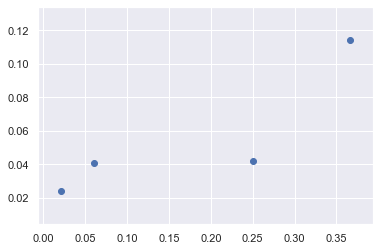

In [76]:
# plot
matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()